In [10]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score, accuracy_score


Load DataSet

In [11]:
data =pd.read_csv("/content/drive/MyDrive/Salary_dataset.csv")


In [12]:
data.head()

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [15]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [16]:
data.tail()

,YearsExperience,Salary
25,9.1,105583
26,9.6,116970
27,9.7,112636
28,10.4,122392
29,10.6,121873


**Handling Missing Value If Exists**

In [17]:
print(data.isnull())

    YearsExperience  Salary
0             False   False
1             False   False
2             False   False
3             False   False
4             False   False
5             False   False
6             False   False
7             False   False
8             False   False
9             False   False
10            False   False
11            False   False
12            False   False
13            False   False
14            False   False
15            False   False
16            False   False
17            False   False
18            False   False
19            False   False
20            False   False
21            False   False
22            False   False
23            False   False
24            False   False
25            False   False
26            False   False
27            False   False
28            False   False
29            False   False


In [18]:
print(data.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


In [19]:
print(data.isnull().sum().count())

2


**Remove Outliers**

In [20]:
def remove_outliers_iqr(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]



**Apply on numerical Values**

In [21]:

for col in data.select_dtypes(include=[np.number]).columns:
    data = remove_outliers_iqr(data, col)

Feature Scaling


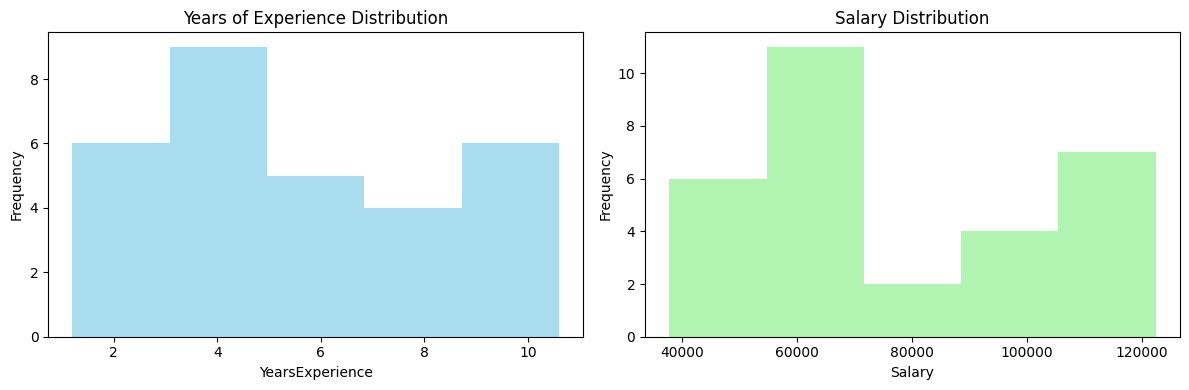

In [22]:
# Plot distributions for the uploaded dataset: 'YearsExperience' and 'Salary'

plt.figure(figsize=(12, 4))

# Distribution of YearsExperience
plt.subplot(1, 2, 1)
plt.hist(data['YearsExperience'], bins=5, color='skyblue', alpha=0.7)
plt.title("Years of Experience Distribution")
plt.xlabel("YearsExperience")
plt.ylabel("Frequency")

# Distribution of Salary
plt.subplot(1, 2, 2)
plt.hist(data['Salary'], bins=5, color='lightgreen', alpha=0.7)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Scatter Plot (Relationship Between Variables)


*   List item
*   List item




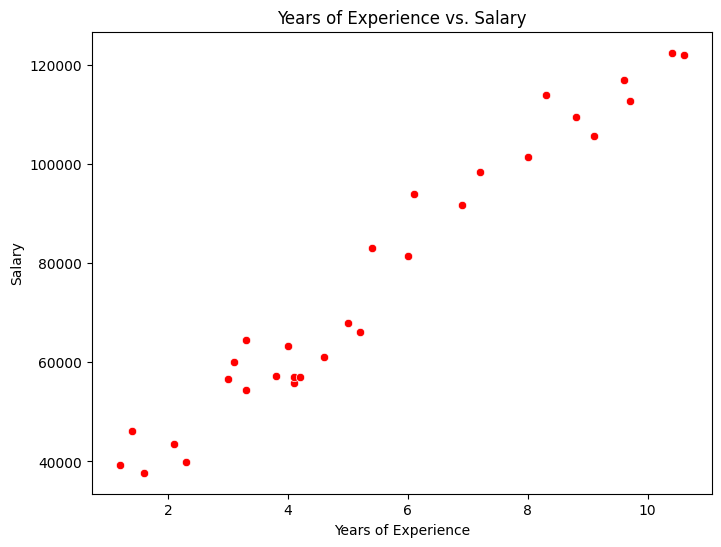

In [23]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsExperience', y='Salary',color='red', data=data)
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [ ]:
# 1. Create and train the model
model = LinearRegression()  # Create a LinearRegression object
X = data[['Scaled_YearsExperience']]  # Features (independent variable)
Y = data['Salary']  # Target (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Split data
model.fit(X_train, y_train)  # Train the model on the training data

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# prompt: plot regression line

import matplotlib.pyplot as plt
# Plot the regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Scaled_YearsExperience', y='Salary', data=data, color='red')  # Use regplot for regression line
plt.title('Years of Experience vs. Salary')
plt.xlabel('Scaled Years of Experience')
plt.ylabel('Salary')
plt.show()

# Evaluate the model using R-squared
r2 = model.score(X_test, y_test)
print(f"R-squared: {r2}")